In [7]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract'
import cv2
import matplotlib.pyplot as plt

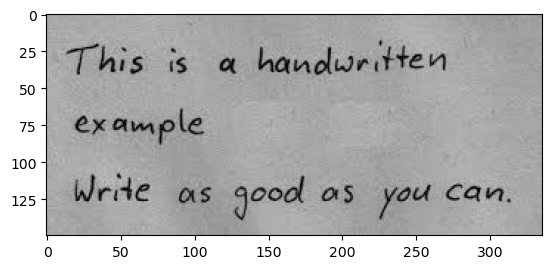

In [36]:
img=cv2.imread('images.jpeg')
plt.imshow(img,cmap='gray')

In [37]:
def img_preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    reduced_noise = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,12)
    return reduced_noise

In [38]:
contours=img_preprocessing(img)

In [39]:
file=open("recognized.txt", "w+")
file.write("")
file.close()

In [42]:
text=pytesseract.image_to_string(contours,lang="eng")

In [41]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [43]:
sentences=sent_tokenize(text)
sentences

['Thistis a: hanguinitten |\nexample , :\n\nWee as geod as you.', 'can.', ':']

In [51]:
words=word_tokenize(text)
words

['Thistis',
 'a',
 ':',
 'hanguinitten',
 '|',
 'example',
 ',',
 ':',
 'Wee',
 'as',
 'geod',
 'as',
 'you',
 '.',
 'can',
 '.',
 ':']

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
filtered_words=[word for word in words if word.lower() not in stop_words]
filtered_words

['Thistis',
 ':',
 'hanguinitten',
 '|',
 'example',
 ',',
 ':',
 'Wee',
 'geod',
 '.',
 '.',
 ':']

In [53]:
from nltk.stem import PorterStemmer

In [54]:
ps=PorterStemmer()
for i in filtered_words:
    print(ps.stem(i))

thisti
:
hanguinitten
|
exampl
,
:
wee
geod
.
.
:


In [59]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...


True

In [61]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...


True

In [62]:
wl=WordNetLemmatizer()
for i in filtered_words:
    print(wl.lemmatize(i))

Thistis
:
hanguinitten
|
example
,
:
Wee
geod
.
.
:
